In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
from glob import glob 
import pandas as pd
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def perspective(IMG,offset):
    pts1 = np.float32([[0, 368], [368, 0],
                       [368, 368], [0, 0]])
    pts2 = np.float32([[0, 368], [368, 0+offset],
                       [368, 368-offset], [0, 0]])
    
    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    IMG = cv2.warpPerspective(IMG, matrix, (368, 368))
    IMG = IMG[38:368-38,50:]
    IMG = cv2.resize(IMG,(368,368))
    return IMG

def shear(IMG,s):
    M2 = np.float32([[1, 0, 0], [s, 1, 0]])
    M2[0,2] = -M2[0,1] * 368/2
    M2[1,2] = -M2[1,0] * 368/2
    IMG = cv2.warpAffine(IMG, M2, (368, 368))
    return IMG

def saturation_range_up(IMG):
    hsv = cv2.cvtColor(IMG, cv2.COLOR_BGR2HSV)
    hsv[:,:,1] *= 1 + np.random.rand()*0.5
    temp = hsv[:,:,1]
    temp[temp>1] = 1
    hsv[:,:,1] = temp  
    back = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return back

def saturation_range_down(IMG):
    hsv = cv2.cvtColor(IMG, cv2.COLOR_BGR2HSV)
    hsv[:,:,1] *= 0.4+np.random.rand()*0.3
    temp = hsv[:,:,1]
    temp[temp>1] = 1
    hsv[:,:,1] = temp  
    back = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return back

In [11]:
fileNameList = glob('../Training Dataset/Cropped Images/*.jpg')
data = np.zeros([len(fileNameList),6])
itr = 0
for name in fileNameList:
    if (name[name.rfind('\\')+1:name.rfind('\\')+2]) == 'A':
        data[itr,1] = 1
    elif (name[name.rfind('\\')+1:name.rfind('\\')+2]) == 'B':
        data[itr,0] = 1
    elif (name[name.rfind('\\')+1:name.rfind('\\')+2]) == 'C':
        data[itr,2] = 1
    elif (name[name.rfind('\\')+1:name.rfind('\\')+2]) == 'D':
        data[itr,3] = 1
    elif (name[name.rfind('\\')+1:name.rfind('\\')+2]) == 'E':
        data[itr,4] = 1
    elif (name[name.rfind('\\')+1:name.rfind('\\')+2]) == 'F':
        data[itr,5] = 1
    itr +=1
    
print(data)

[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


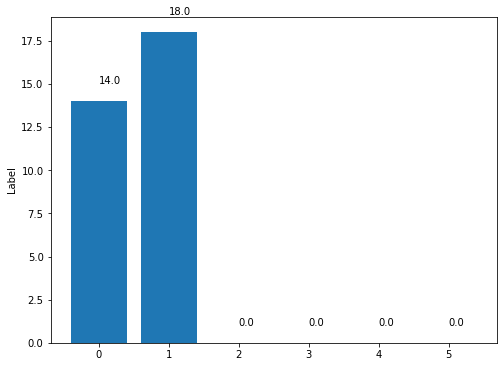

In [12]:
f,ax = plt.subplots(figsize = (8,6))
hist = np.sum(data[:,:], axis=0)
ax.bar(np.array([0,1,2,3,4,5]),hist)
ax.set_ylabel('Count')
ax.set_ylabel('Label')
for i in range(6):
    plt.text(i,hist[i]+1,str(hist[i]))

In [13]:
L = len(fileNameList)
stack = np.empty((L, 224,224,3))
itr = 0
for name in fileNameList:
    stack[itr,:,:,:] = cv2.resize(cv2.imread(name).astype('float32'),(224,224)     )/255
    itr += 1

In [14]:
label = data
label_no = np.expand_dims(np.asarray(list(range(L))),axis =1)
label = np.concatenate((label_no,label),axis = 1)
for xx in label:
    print(xx)

[0. 0. 1. 0. 0. 0. 0.]
[1. 0. 1. 0. 0. 0. 0.]
[2. 0. 1. 0. 0. 0. 0.]
[3. 0. 1. 0. 0. 0. 0.]
[4. 0. 1. 0. 0. 0. 0.]
[5. 0. 1. 0. 0. 0. 0.]
[6. 0. 1. 0. 0. 0. 0.]
[7. 0. 1. 0. 0. 0. 0.]
[8. 0. 1. 0. 0. 0. 0.]
[9. 0. 1. 0. 0. 0. 0.]
[10.  0.  1.  0.  0.  0.  0.]
[11.  0.  1.  0.  0.  0.  0.]
[12.  0.  1.  0.  0.  0.  0.]
[13.  0.  1.  0.  0.  0.  0.]
[14.  0.  1.  0.  0.  0.  0.]
[15.  0.  1.  0.  0.  0.  0.]
[16.  0.  1.  0.  0.  0.  0.]
[17.  0.  1.  0.  0.  0.  0.]
[18.  1.  0.  0.  0.  0.  0.]
[19.  1.  0.  0.  0.  0.  0.]
[20.  1.  0.  0.  0.  0.  0.]
[21.  1.  0.  0.  0.  0.  0.]
[22.  1.  0.  0.  0.  0.  0.]
[23.  1.  0.  0.  0.  0.  0.]
[24.  1.  0.  0.  0.  0.  0.]
[25.  1.  0.  0.  0.  0.  0.]
[26.  1.  0.  0.  0.  0.  0.]
[27.  1.  0.  0.  0.  0.  0.]
[28.  1.  0.  0.  0.  0.  0.]
[29.  1.  0.  0.  0.  0.  0.]
[30.  1.  0.  0.  0.  0.  0.]
[31.  1.  0.  0.  0.  0.  0.]


C:\Users\Brea-RD\AppData\Local\Temp/ipykernel_40868/4286095340.py:4: RuntimeWarning: Mean of empty slice.
  ax[i].imshow(stack[mask,:,:,::-1].mean(0))


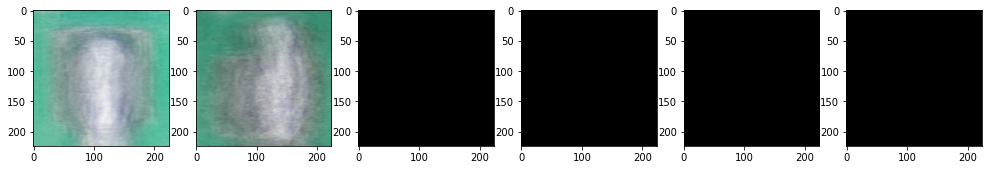

In [15]:
f,ax = plt.subplots(1,6,figsize = (17,4))
for i in range(6):
    mask = label[:,i+1]==1
    ax[i].imshow(stack[mask,:,:,::-1].mean(0))

In [17]:
data_gen_args_train = dict(fill_mode = 'reflect',
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.1,
                     shear_range=3,
                     horizontal_flip=True)

datagen_train = ImageDataGenerator(**data_gen_args_train)
image_generator_1 = datagen_train.flow(stack, label, seed=1)
volume = 3000
i = 0
#fig = plt.figure()
no = 0
label_aug = np.zeros((volume,7))
train_aug = np.zeros((volume,224,224,3))
while (no < volume):
    aug_1 = next(image_generator_1)
    for j in range(aug_1[1].shape[0]):
        label_aug[no,:]=aug_1[1][j,:]
        cv2.imwrite('../Training Dataset/Augmented Images/'+str(no)+'.png', aug_1[0][j,:,:,:]*255)
        train_aug[no,:,:,:] = aug_1[0][j,:,:,::-1]*255
        no += 1
        if no > (volume-1):
            break
    i += 1
label_aug = np.array(label_aug)

In [18]:
np.save('../Training Dataset/train_signal.npy', train_aug.astype('float32'))
np.save('../Training Dataset/label_signal.npy', label_aug)

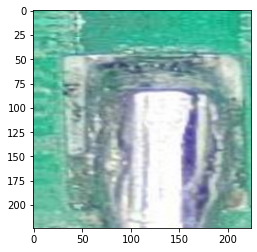

In [19]:
plt.figure()
plt.imshow(train_aug[no-1,:,:,:]/255)